<a href="https://colab.research.google.com/github/mehulpuri/ML/blob/main/3.Linear_Regression_With_Multiple_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#1 Generating Data , we use sklearn.datasets to generate data for us
X,y = make_regression(n_samples=500, n_features=10, n_informative= 5, noise= 25.8, random_state=0 )
print(X.shape, y.shape)
n_features = X.shape[1]


(500, 10) (500,)


In [ ]:
pd.DataFrame(X).head(n=100)

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090
...,...,...,...,...,...,...,...,...,...,...
95,1.396849,2.123526,-0.104049,0.881225,0.374969,-0.432827,-0.088373,0.494445,0.761391,0.267671
96,-0.954943,0.100564,1.102283,-0.697073,1.010428,-1.470402,0.207334,0.496179,0.576956,0.759157
97,0.715939,0.542611,0.147434,-0.977465,0.880938,-2.994613,0.879390,1.808132,0.436638,0.635425
98,-0.177813,-1.892362,1.905064,-0.014777,1.054758,0.250998,-0.300479,0.960048,-0.416499,-0.355029


In [ ]:
#Normalizing Data
def normalise(X):
  u= X.mean(axis=0) # mean calculated along the rows of X
  std = X.std(axis=0)
  return (X-u)/std



In [ ]:
X = normalise(X)
pd.DataFrame(X).head()


,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [ ]:
X.mean(axis=0)
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

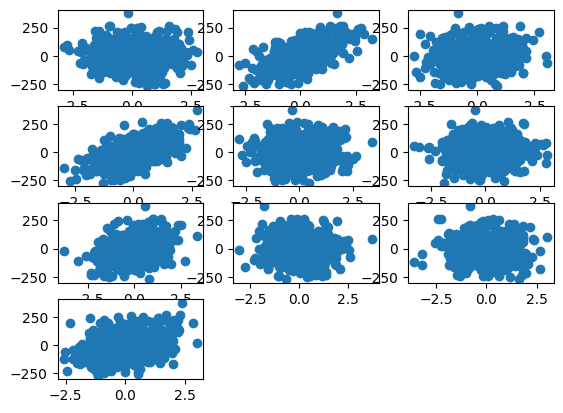

In [ ]:
#Visualise Y as a function of each feature
for feature in range(0,10):
  plt.subplot(4,3,feature+1)
  plt.scatter(X[:, feature], y)
plt.show()

# using this we see that some features are not informative

In [ ]:
XT, Xt, yT, yt=train_test_split(X,y, test_size=0.3, random_state=0, shuffle=False)


In [ ]:
print(XT.shape, yT.shape, Xt.shape, yt.shape)

(350, 11) (350,) (150, 11) (150,)


In [ ]:
#Preprocessing the Data and adding a column of 1s in the beginning
def preprocess(X):
  if X.shape[1]==n_features:
    m=X.shape[0]
    ones = np.ones((m,1))
    X= np.hstack((ones, X))
  return X

In [ ]:
X=preprocess(X)
pd.DataFrame(X).head()
XT=preprocess(XT)
Xt=preprocess(Xt)

In [ ]:
def hypothesis(X, theta):
  return np.dot(X, theta)

def loss(X, y, theta):
  yp = hypothesis(X, theta)
  error = np.mean((y-yp)**2)
  return error

def gradient(X, y, theta):
  yp = hypothesis(X, theta)
  grad = np.dot(X.T, (yp-y))
  m = X.shape[0]
  return grad/m

def train(X, y, learning_rate=0.1, maxitrs= 100):
  n=X.shape[1]
  theta=np.random.randn(n)
  error_list=[]
  for i in range(maxitrs):
    e=loss(X, y, theta)
    error_list.append(e)
    grad = gradient(X, y, theta)
    theta=theta-learning_rate*grad
  plt.plot(error_list)
  return theta



[-5.1579007  -0.26655973 61.8194474  11.37840657 65.52681267 -0.48119644
  0.93732809 41.17549029  0.54499252  0.75631186 22.42682607]


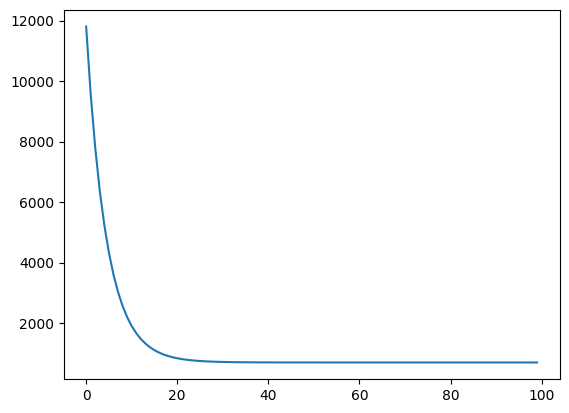

In [ ]:
theta=train(XT, yT)
print(theta)

In [ ]:
yp =  hypothesis(Xt, theta)
yp.shape

(150,)

In [ ]:
def r2score(y, yp):
  ymean = y.mean()
  num = np.sum((y-yp)**2)
  denom = np.sum((y-ymean)**2)
  return 1-num/denom

In [ ]:
r2score(yt, yp)*100

92.77799835248382

In [ ]:
# Using sklearn on the same model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(XT, yT)

LinearRegression()

In [ ]:
yp= model.predict(Xt)

In [ ]:
model.score(Xt, yt)

0.9321372696807688